# Exploratory Data Analysis

In [1]:
# Libraries and load the data
# =============================================================================
import warnings
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from pyod.models.knn import KNN
from fitter import Fitter, get_common_distributions


# Config 
# =============================================================================
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel", color_codes=True)
warnings.filterwarnings("ignore")

# Load data
# =============================================================================
df = pd.read_csv('../data/raw/temp_df_cleaned.csv', index_col=0)
df

,propertyType,municipality,status,numPhotos,rooms,bathrooms,floor,size,priceByArea,parkingSpacePrice,exterior,hasVideo,hasPlan,has3DTour,has360,hasLift,isFinished,hasParkingSpace,isParkingSpaceIncludedInPrice,latitude,longitude,price
propertyCode,,,,,,,,,,,,,,,,,,,,,,
97942302,countryHouse,Riba-Roja de Túria,good,23,5,2,0,140.0,6.0,0.0,False,False,False,False,False,False,True,False,False,39.544071,-0.566219,850.0
97956954,duplex,Manises,good,18,3,3,1,100.0,9.0,0.0,True,False,False,False,False,True,True,True,True,39.499602,-0.474603,900.0
98200619,flat,València,good,26,3,2,2,145.0,8.0,0.0,True,False,False,False,False,True,True,False,False,39.466220,-0.387735,1200.0
98341195,chalet,Godella,good,48,4,5,0,339.0,8.0,0.0,False,True,True,False,False,False,True,True,True,39.529005,-0.425450,2700.0
98015046,flat,València,good,21,3,2,0,103.0,17.0,0.0,True,True,False,False,False,True,True,False,False,39.470266,-0.331696,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98214599,flat,València,newdevelopment,34,3,2,2,104.0,10.0,0.0,False,False,True,False,False,True,False,False,False,39.441000,-0.381710,995.0
98214582,flat,València,newdevelopment,34,3,2,1,109.0,10.0,0.0,False,False,True,False,False,True,False,False,False,39.441400,-0.385010,1085.0
98091690,flat,València,newdevelopment,34,3,2,10,103.0,10.0,0.0,False,False,True,False,False,True,False,False,False,39.439600,-0.382210,1045.0


### Target Variable

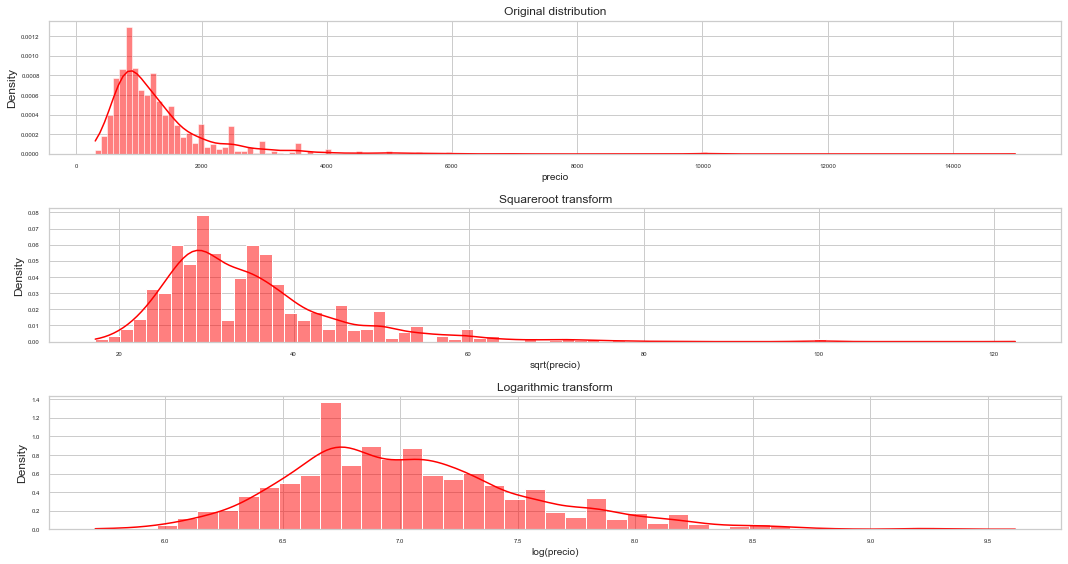

In [2]:
# Graphs of distribution of rent prices
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,8))

sns.histplot(df['price'], kde=True, stat='density', ax=axes[0], color='red')
axes[0].set_title("Original distribution", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.histplot(np.sqrt(df['price']), kde=True, stat='density', ax=axes[1], color='red')
axes[1].set_title("Squareroot transform", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.histplot(np.log(df['price']), kde=True, stat='density', ax=axes[2], color='red')
axes[2].set_title("Logarithmic transform", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [3]:
# Kurtosis and Skewness
# =============================================================================
kurtosis = df['price'].kurtosis()
print(f"Kurtosis = {kurtosis:.2f}")

skewness = df['price'].skew()
print(f"Skewness = {skewness:.2f}")

Kurtosis = 34.83
Skewness = 4.33


In [4]:
distribuciones = get_common_distributions()

fitter = Fitter(df['price'], distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div
lognorm,2.943438e-07,2798.140958,-69639.682076,inf
cauchy,6.351077e-07,2479.614276,-67323.638053,inf
rayleigh,1.136625e-06,6786.419558,-65564.762546,inf
norm,1.533545e-06,7869.777331,-64659.615527,inf
expon,1.646202e-06,2814.307420,-64445.390152,inf
exponpow,1.840168e-06,4775.622567,-64100.767219,inf
powerlaw,3.571867e-06,1992.840210,-62096.481878,inf
uniform,3.862158e-06,1923.120555,-61868.363387,inf
chi2,4.324928e-06,278889.167309,-61518.351723,inf
gamma,4.324928e-06,556336.158311,-61518.351711,4.612477


All this information tell us that the target variable is not distributed in a normalized way. So we need to normalize it to work with more understandable models like linear regression

### Numeric Variables

In [5]:
df.describe()

,numPhotos,rooms,bathrooms,floor,size,priceByArea,parkingSpacePrice,latitude,longitude,price
count,3022.00000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000
mean,23.77002,2.817340,1.753805,3.133686,121.477498,12.372601,12.988749,39.458136,-0.369901,1333.656519
std,12.96285,1.215748,0.918894,2.863321,96.846418,7.265988,546.022447,0.131589,0.086938,958.158369
min,0.00000,0.000000,0.000000,-1.000000,17.000000,1.000000,0.000000,38.808141,-1.102045,300.000000
25%,15.00000,2.000000,1.000000,1.000000,79.000000,8.000000,0.000000,39.463591,-0.388508,800.000000
50%,22.00000,3.000000,2.000000,3.000000,100.000000,11.000000,0.000000,39.472625,-0.372168,1100.000000
75%,30.00000,3.000000,2.000000,4.000000,129.000000,14.000000,0.000000,39.487776,-0.343797,1500.000000
max,104.00000,16.000000,15.000000,18.000000,1442.000000,88.000000,30000.000000,39.834773,-0.049460,15000.000000


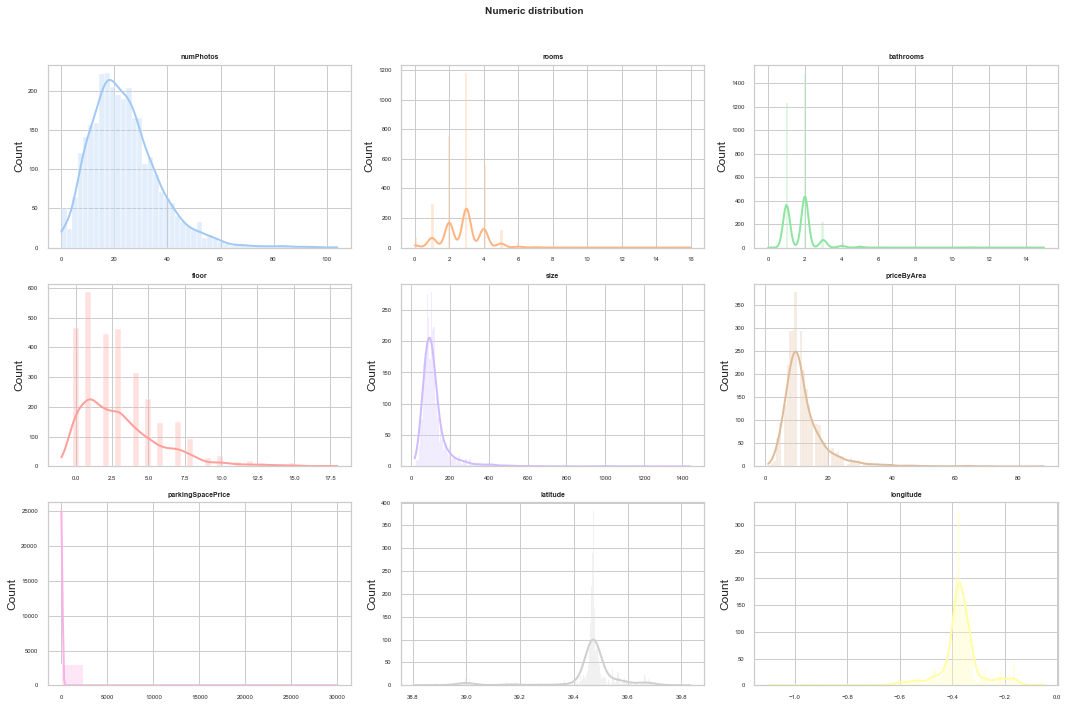

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columns_numeric = df.select_dtypes(include=['float64', 'int']).columns
columns_numeric = columns_numeric.drop(['price'])

for i, col in enumerate(columns_numeric):
    sns.histplot(
        df[col],
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Numeric distribution', fontsize = 10, fontweight = "bold");

We can see that parkingSpacePrice probably have outliers in it. So we need to eliminate the outlier to continue the analysis.

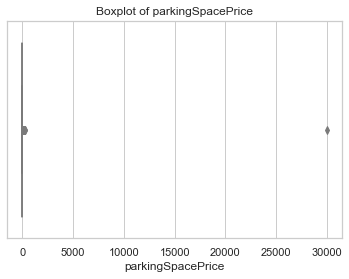

In [7]:
# Boxplot of parkingSpacePrice
# =============================================================================
sns.boxplot(x='parkingSpacePrice', data=df)
plt.title('Boxplot of parkingSpacePrice', fontsize = 'medium')
plt.show()

In [8]:
df[df['parkingSpacePrice'] == 30000]

,propertyType,municipality,status,numPhotos,rooms,bathrooms,floor,size,priceByArea,parkingSpacePrice,exterior,hasVideo,hasPlan,has3DTour,has360,hasLift,isFinished,hasParkingSpace,isParkingSpaceIncludedInPrice,latitude,longitude,price
propertyCode,,,,,,,,,,,,,,,,,,,,,,
97296024,flat,València,good,47,3,2,18,169.0,11.0,30000.0,False,False,True,False,False,True,True,True,False,39.490158,-0.401217,1800.0


In [9]:
df = df.drop(df[df['parkingSpacePrice'] == 30000].index)

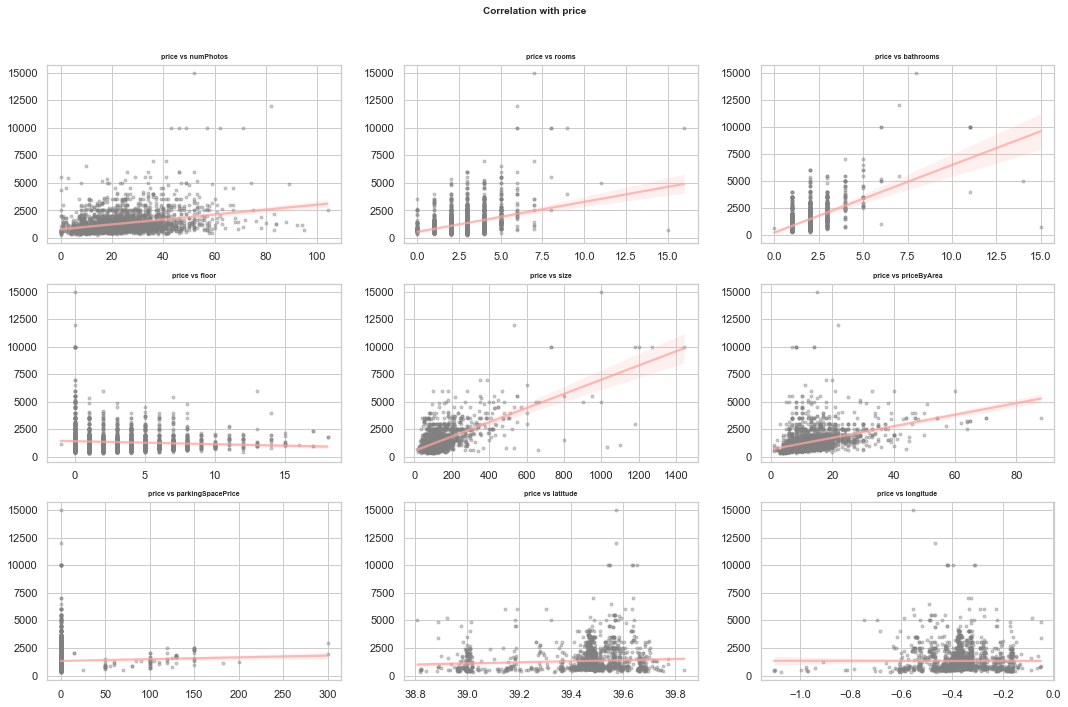

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columns_numeric = df.select_dtypes(include=['float64', 'int']).columns
columns_numeric = columns_numeric.drop(['price'])

for i, col in enumerate(columns_numeric):
    sns.regplot(
        x           = df[col],
        y           = df['price'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"price vs {col}", fontsize = 7, fontweight = "bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with price', fontsize = 10, fontweight = "bold");

It's also insteresting to see that the variable numPhotos seems to be positively correlated with the target variable.

In [11]:
# Correlation between numeric variables
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
42,size,bathrooms,0.725832,0.725832
24,bathrooms,size,0.725832,0.725832
49,size,price,0.652715,0.652715
94,price,size,0.652715,0.652715
12,rooms,bathrooms,0.633824,0.633824
21,bathrooms,rooms,0.633824,0.633824
92,price,bathrooms,0.599229,0.599229
29,bathrooms,price,0.599229,0.599229
14,rooms,size,0.582149,0.582149
41,size,rooms,0.582149,0.582149


Here it is indicating that the more size, more bathrooms, more rooms, and price that is logically associated.

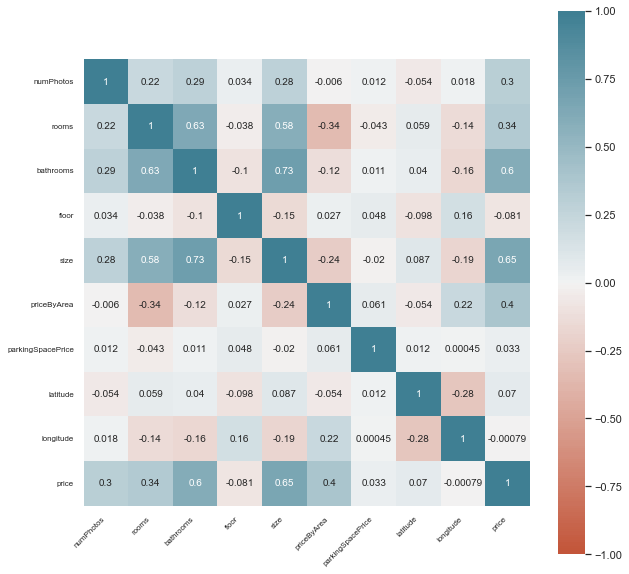

In [12]:
# Heatmap of correlation between numeric variables
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

### Categorical Variables

In [13]:
df.select_dtypes(include=['object']).describe()

,propertyType,municipality,status
count,3021,3021,3021
unique,6,122,3
top,flat,València,good
freq,2364,1929,2978


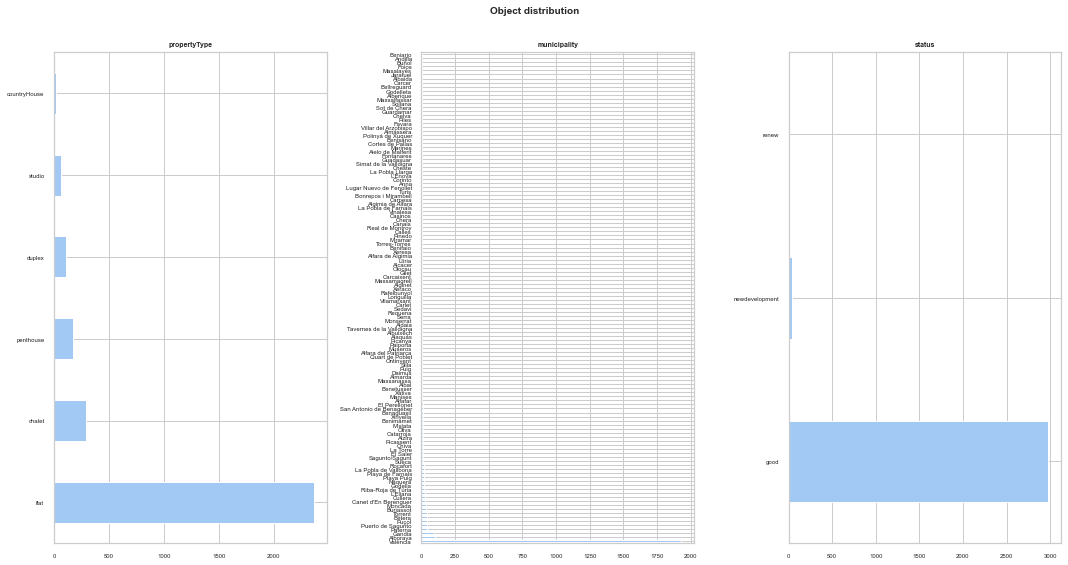

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
axes = axes.flat
columns_object = df.select_dtypes(include=['object']).columns

for i, col in enumerate(columns_object):
    df[col].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Object distribution', fontsize = 10, fontweight = "bold");

We have many municipalities in Valencia. So we will see it the top 10 that have the highest number of rent ads

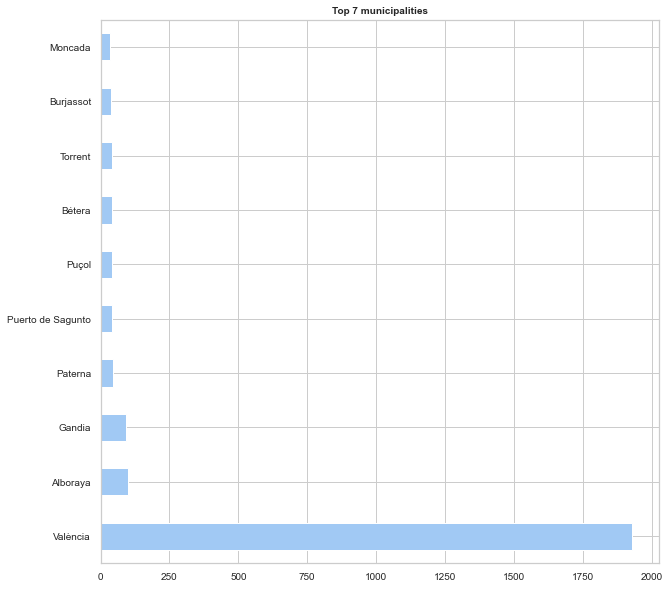

In [15]:
# graph of top 10 of municipality
# ==============================================================================
df['municipality'].value_counts().head(10).plot.barh(figsize=(10, 10))
plt.title('Top 7 municipalities', fontsize = 10, fontweight = "bold")
plt.xlabel("")
plt.ylabel("")
plt.tick_params(labelsize = 10)

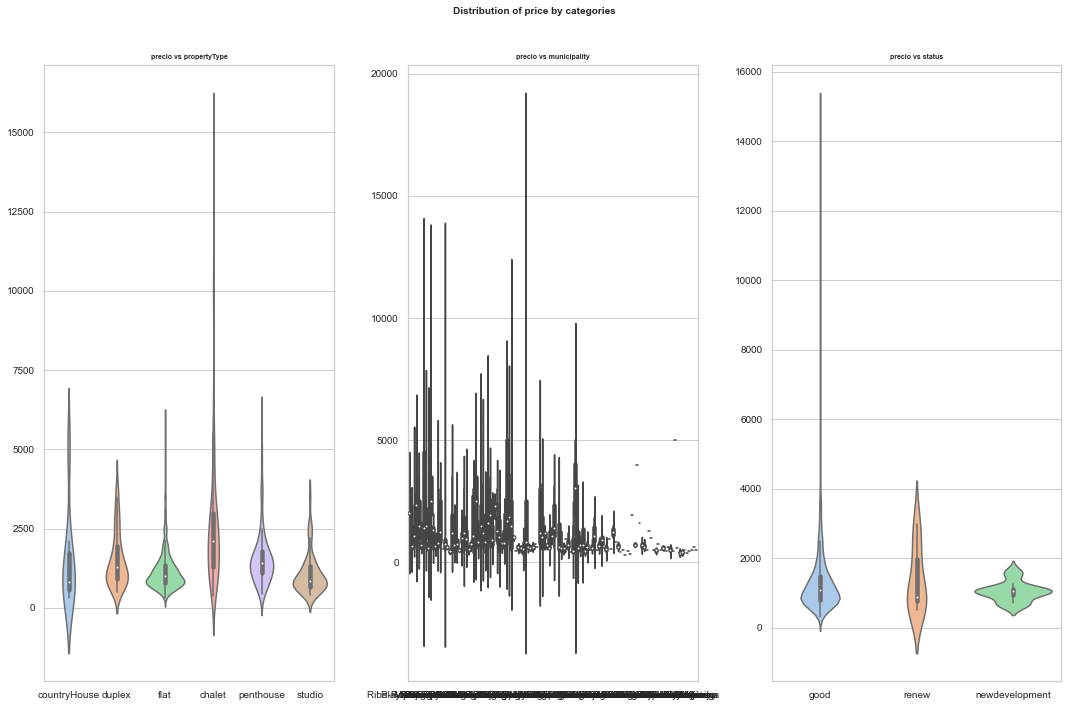

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
axes = axes.flat
columns_object = df.select_dtypes(include=['object']).columns

for i, col in enumerate(columns_object):
    sns.violinplot(
        x     = col,
        y     = 'price',
        data  = df,
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {col}", fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribution of price by categories', fontsize = 10, fontweight = "bold");

The variable status it's pretty desbalanced. So it will be more useful to rework on this variable

### Multivariate Analysis

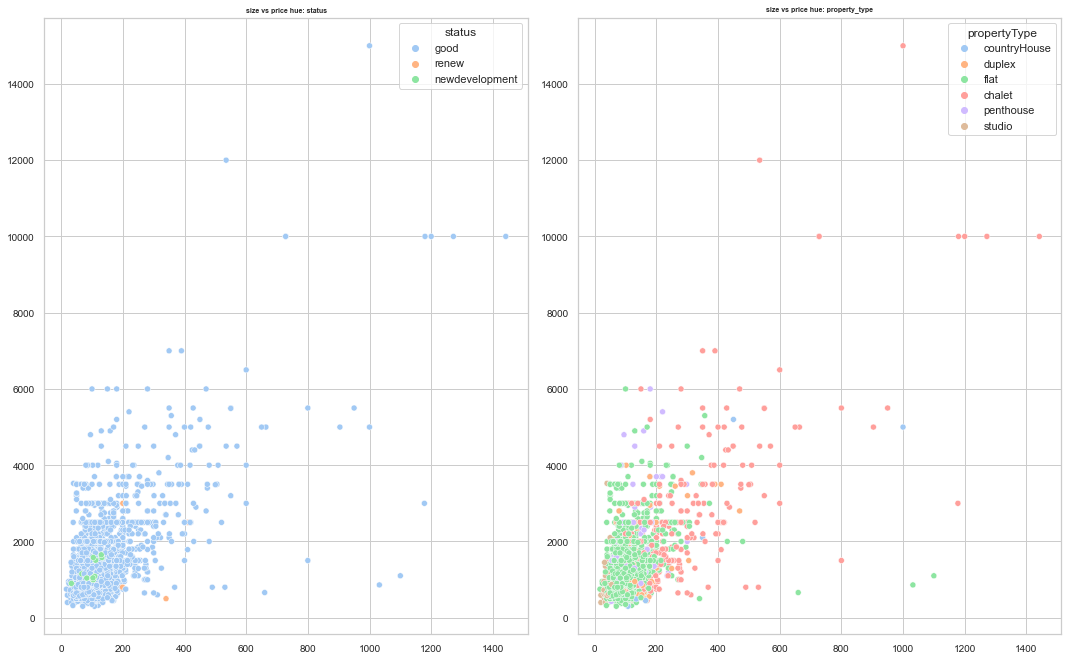

In [17]:
# graph size vs price hue: status, property_type
# ==============================================================================
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes = axes.flat

# hue: status
sns.scatterplot(
    x     = 'size',
    y     = 'price',
    hue   = 'status',
    data  = df,
    ax    = axes[0]
)
axes[0].set_title('size vs price hue: status', fontsize = 7, fontweight = "bold")
axes[0].tick_params(labelsize = 10)
axes[0].set_xlabel("")
axes[0].set_ylabel("")

# hue: property_type
sns.scatterplot(
    x     = 'size',
    y     = 'price',
    hue   = 'propertyType',
    data  = df,
    ax    = axes[1]
)
axes[1].set_title('size vs price hue: property_type', fontsize = 7, fontweight = "bold")
axes[1].tick_params(labelsize = 10)
axes[1].set_xlabel("")
axes[1].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)

It's logical that in the column status everithing will be categorized as 'good' because this information is written by the owner of the ads so we can only track the new developments and renew and see if it's useful to our model.

### Outliers

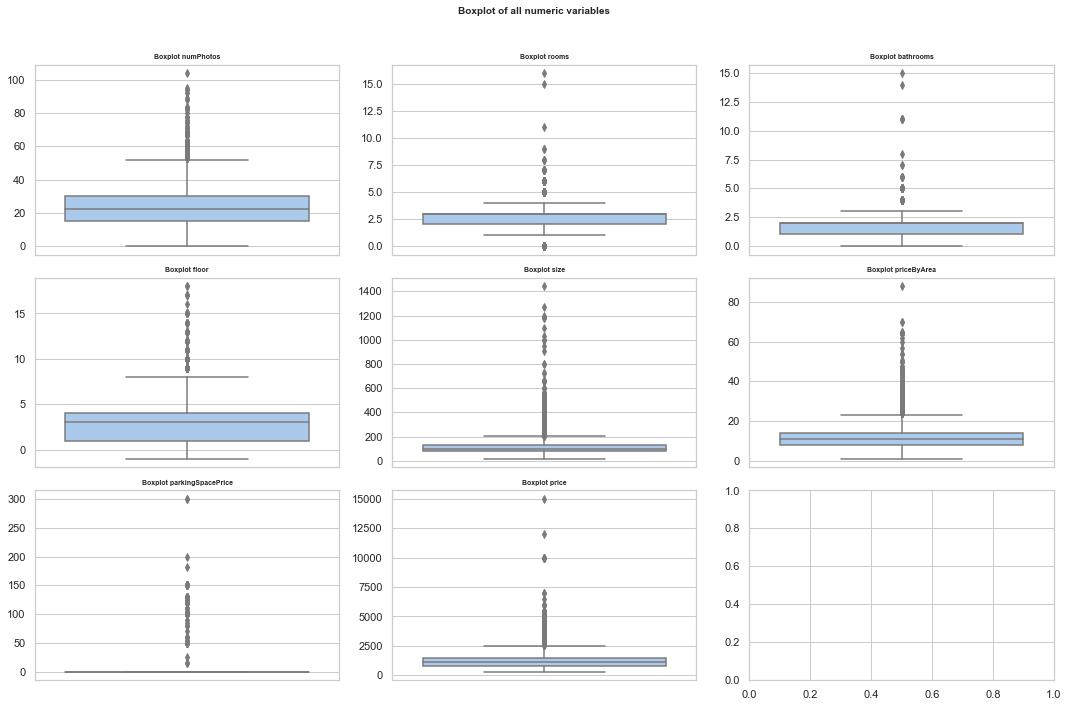

In [18]:
# Boxplot of all numeric variables
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flat
columns_numeric = df.select_dtypes(include=['float64', 'int']).columns
columns_numeric = columns_numeric.drop(['longitude', 'latitude'])

for i, col in enumerate(columns_numeric):
    sns.boxplot(
        y = col,
        data = df,
        ax = axes[i]
    )
    axes[i].set_title(f"Boxplot {col}", fontsize = 7, fontweight = "bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Boxplot of all numeric variables', fontsize = 10, fontweight = "bold");


In [19]:
# Detecting outliers by KNN distance
columns_numeric = df.select_dtypes(include=['float64', 'int']).columns
clf = KNN(contamination=0.1)
clf.fit(df[columns_numeric])
y_pred = clf.predict(df[columns_numeric])

# Percentage of outliers
# ==============================================================================
(len(df[y_pred == 1]) / len(df)) * 100 

8.606421714664018

We can eliminate the outliers because it represents 8.6% of the data.

### Conclusion
- The target variable is not distributed in a normalized way. So we need to normalize it to work with more understandable models like linear regression or work with logarithmic scale.
- It seems that all numeric variables are positively correlated with the target variable. Except for floor 
- The municipality variable is pretty desbalanced. So it will be more useful to rework on this variable for example by using an unsupervised learning technique like K-means or Hierarchical Clustering to get clusters of groups of the houses. This will help to get the most relevant information and we can do it by longitude and latitude.
- The majority of the houses have status 'good' so we need to rework on this variable only getting the renew and new developments.
- Eliminate the price by area because it will cause a lot of problems in the model.